<div id="container" style="position:relative;">

<div style="position:relative; float:right">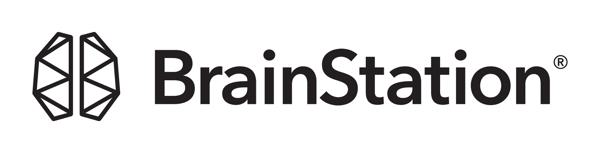
</div>
</div>

June 2024

Mengxiao Wang

## Table of Contents

[Introduction](#Introduction)


[Initial Data Cleaning](#initial-data-cleaning)


[EDA](#EDA)


[Preprocessing](#Preprocessing) 


[Modelling](#Modelling)


[Conclusion](#Conclusion)


## Introduction

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.、

Electronic Health Records (EHRs) are the primary source of data for the Diabetes Prediction dataset. EHRs are digital versions of patient health records that contain information about their medical history, diagnosis, treatment, and outcomes. The data in EHRs is collected and stored by healthcare providers, such as hospitals and clinics, as part of their routine clinical practice.

To create the Diabetes Prediction dataset, EHRs were collected from multiple healthcare providers and aggregated into a single dataset. The data was then cleaned and preprocessed to ensure consistency and remove any irrelevant or incomplete information.

The use of EHRs as a data source for the Diabetes Prediction dataset has several advantages. First, EHRs contain a large amount of patient data, including demographic and clinical information, which can be used to develop accurate machine learning models. Second, EHRs provide a longitudinal view of a patient's health over time, which can be used to identify patterns and trends in their health status. Finally, EHRs are widely used in clinical practice, making the Diabetes Prediction dataset relevant to real-world healthcare settings.

## Initial Data Cleaning

First of all, we need to read in the data and perform initial inspections. It will consist of three parts: 
- (1) Checking datatypes and formats  
- (2) Dealing with duplicate values 
- (3) Check for the Null Values


In [1]:
# Import the relevant libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = 'ignore')


In [2]:
df = pd.read_csv("/Users/mengxiaowang/Downloads/diabetes_prediction_dataset.csv")

# Look at the first few rows of data
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


##### Data Dictionary

- `gender`: Gender of the individual (Female or Male)
- `age`: Age of the individual
- `hypertension`: Whether the individual has hypertension (1 for yes, 0 for no)
- `heart_disease`: Whether the individual has heart disease (1 for yes, 0 for no)
- `smoking_history`: Smoking history of the individual
- `bmi`: Body Mass Index of the individual
- `HbA1c_level`: Hemoglobin A1c level
- `blood_glucose_level`: Blood glucose level
- `diabetes`: Target variable indicating whether the individual has diabetes (1 for yes, 0 for no)

In [3]:
print(f'We have {df.shape[0]} rows and {df.shape[1]} columns')

We have 100000 rows and 9 columns


In [4]:
df.shape

(100000, 9)

In [5]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

#### (1)check datatypes and formats

In [6]:
# use df.info() to quickly check datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


- There are no null values.
- 'gender' and 'smoking_history' are object datatype, it means they contain categorical information.


#### (2)Dealing with duplicate values

When dealing with duplicates, we need to remove duplicate rows and duplicate columns.

In [7]:
df[df.duplicated(keep='first')].sort_values(['gender', 'age', 'HbA1c_level', 'blood_glucose_level'])

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
59468,Female,2.0,0,0,No Info,27.32,5.0,158,0
67439,Female,2.0,0,0,No Info,27.32,6.0,85,0
67234,Female,2.0,0,0,No Info,27.32,6.0,145,0
97294,Female,2.0,0,0,No Info,27.32,6.2,145,0
89701,Female,2.0,0,0,No Info,27.32,6.5,155,0
...,...,...,...,...,...,...,...,...,...
54794,Male,80.0,0,0,No Info,27.32,6.6,159,0
75961,Male,80.0,0,0,No Info,27.32,6.6,159,0
46764,Male,80.0,0,0,No Info,27.32,6.6,160,0
73316,Male,80.0,0,0,No Info,27.32,6.6,160,0


We have 3854 duplicated rows, which translates to ~3% of our total dataset. Let's look into these in more detail.

In [8]:

df = df.drop_duplicates()

In [9]:
# Checking for duplicate cols
# Transpose the dataframe first to make the columns the rows
df.T.duplicated()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

In [10]:
df.shape

(96146, 9)

In [11]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

##### (3) Check the Null Values
we already came out the conclusion that there is no null value when we check the data info, but we can double check it to be sure.

## EDA

#### Distribution of numerical cols

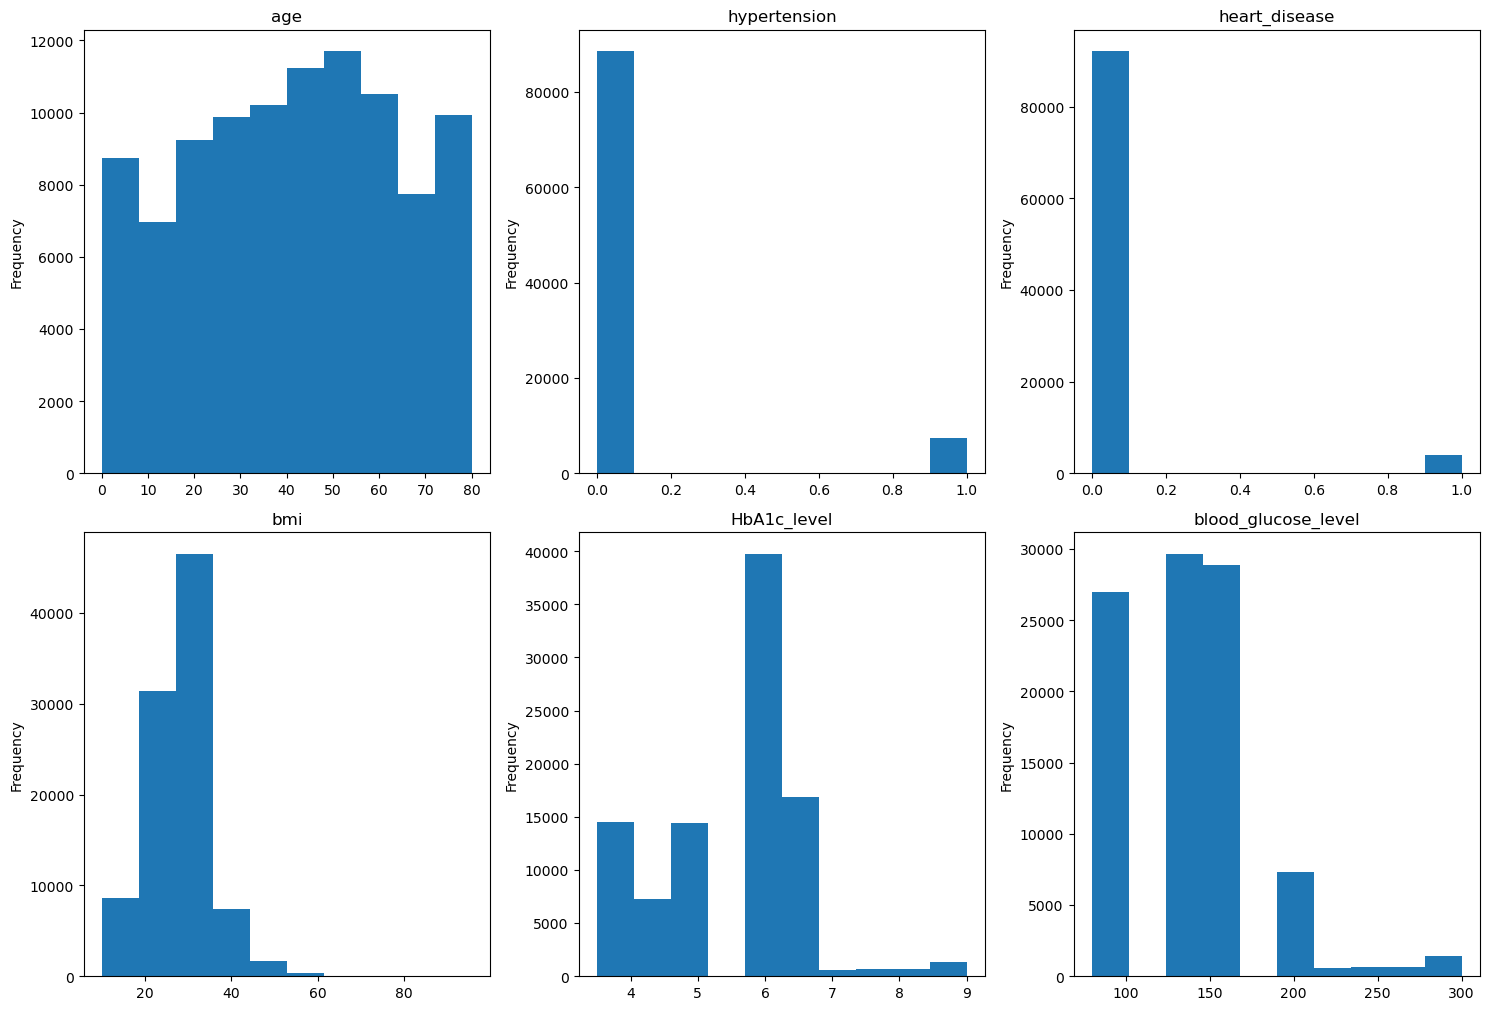

In [12]:
num_cols = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
len(num_cols)
plt.subplots(2, 3, figsize = (15, 15))

for i, col in enumerate(num_cols):
    ax = plt.subplot(3,3,i+1) 


    df[col].plot(kind = 'hist')
    plt.title(f'{col}')
  


plt.tight_layout()


plt.show()

Obeservations:

- Small amount of people have Hypertension and Heart Disease.
- Most of peole have BMI between 20 and 40
- The HbA1c levels are concentrated around 5 and 6
- The blood glucose levels are mostly between 100 and 150.

#### Distribution of category cols

In [13]:
cat_cols = df.dtypes[df.dtypes.values == 'object'].index.tolist()

cat_cols

['gender', 'smoking_history']

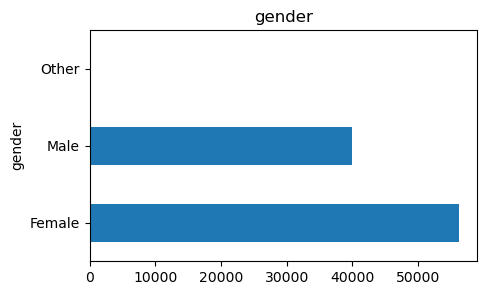

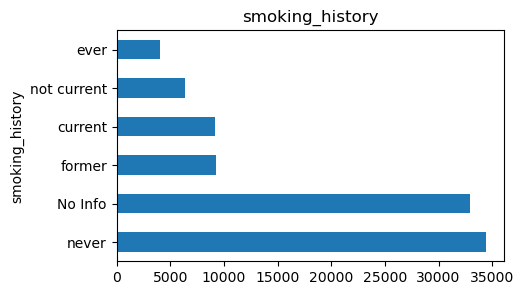

In [14]:
# take a look at the detail of the categorical column 
# later I will convert them into numerial column

for col in cat_cols:
    plt.figure(figsize=(5,3))
    # We can leverage pandas plotting within regular plt syntax
    df[col].value_counts().plot(kind='barh')
    plt.title(f'{col}')

    plt.show()

In [15]:
# numerical columns
num_cols = df.dtypes[df.dtypes.values != 'object'].index.tolist()
len(num_cols)


7

#### Movement of numerical coulmns to target column

Build subplots and see in detail their realtionship with the diabetes.

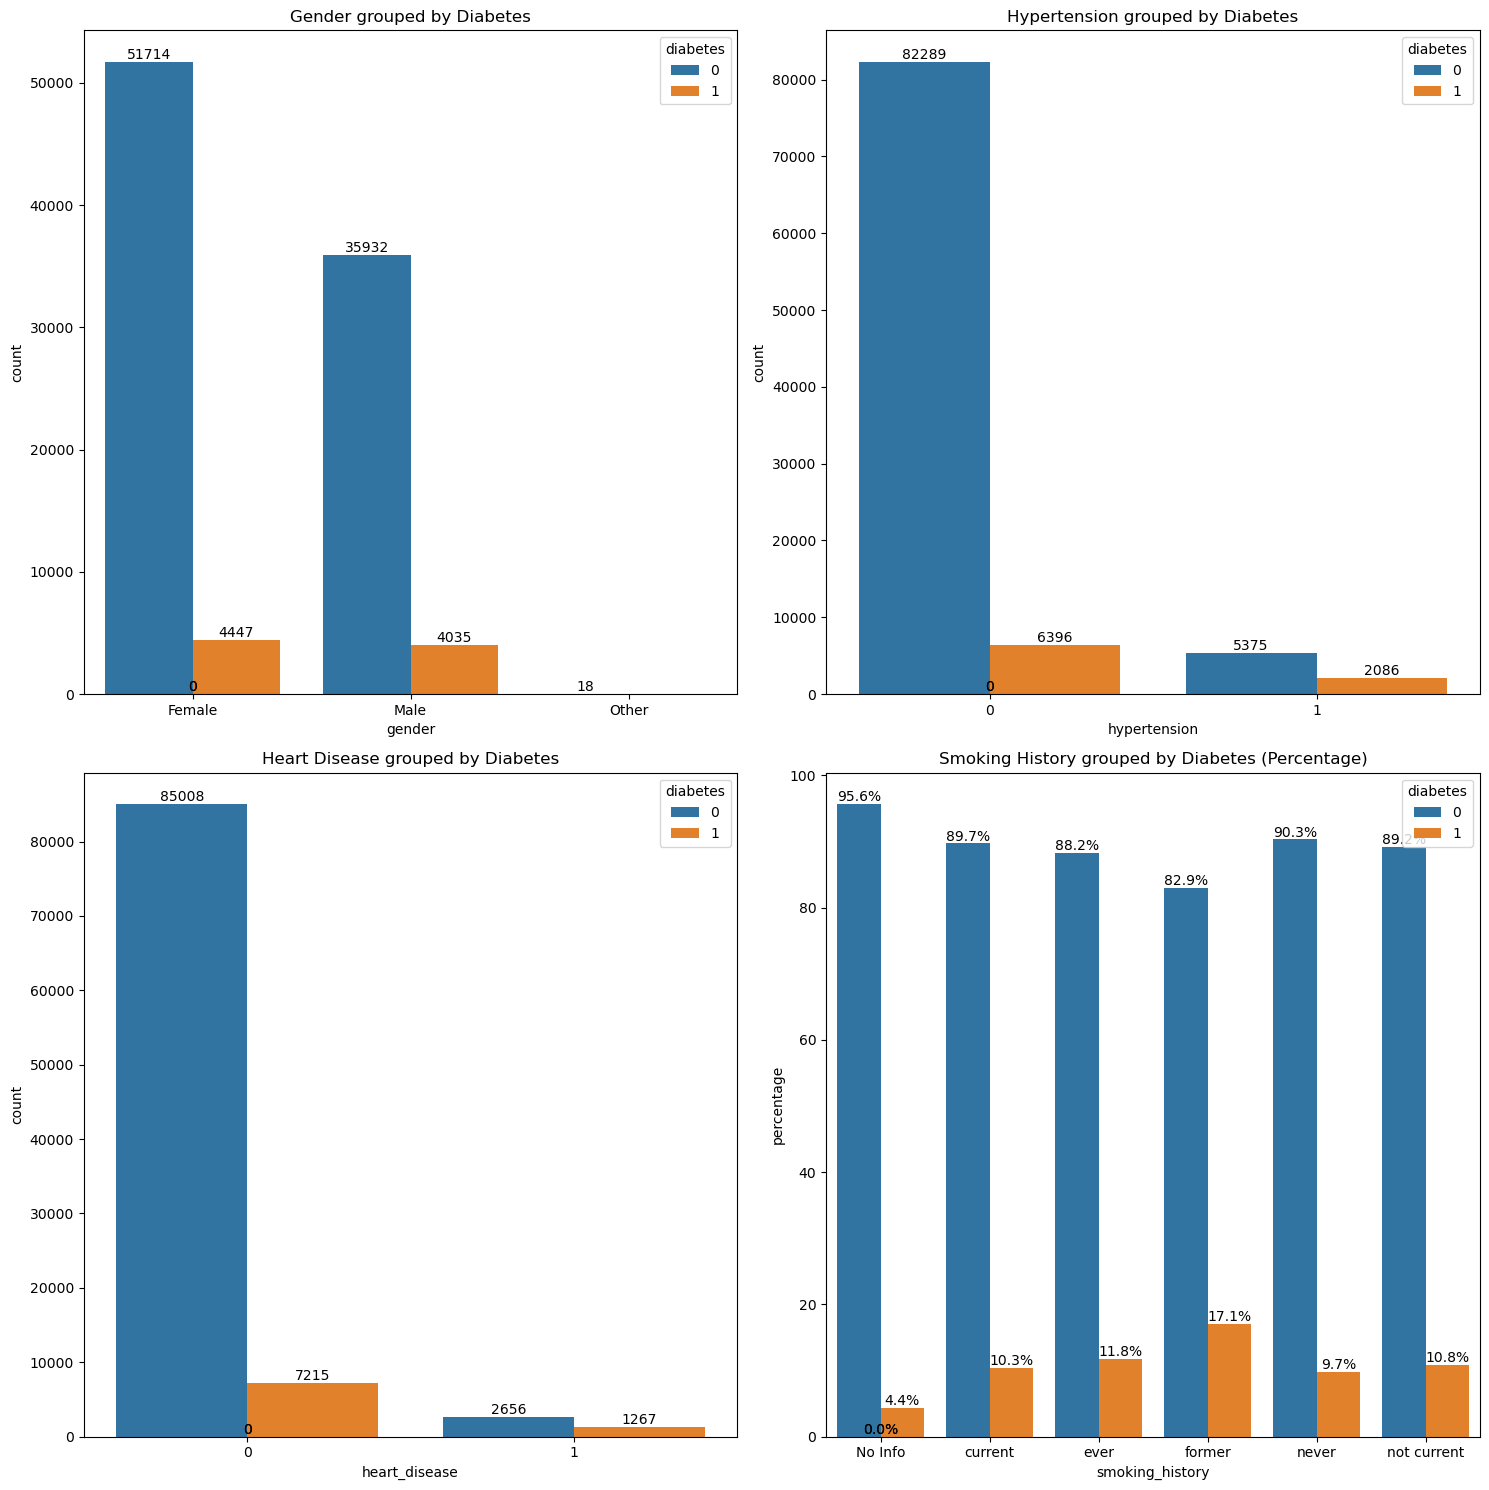

In [16]:

# Function to add counts on bars
def add_counts(ax, is_percentage=False):
    for p in ax.patches:
        if is_percentage:
            annotation = f'{p.get_height():.1f}%'
        else:
            annotation = f'{int(p.get_height())}'
        ax.annotate(annotation, (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Plot gender grouped by diabetes
ax = sns.countplot(ax=axes[0, 0], x='gender', hue='diabetes', data=df)
axes[0, 0].set_title('Gender grouped by Diabetes')
add_counts(ax)

# Plot hypertension grouped by diabetes
ax = sns.countplot(ax=axes[0, 1], x='hypertension', hue='diabetes', data=df)
axes[0, 1].set_title('Hypertension grouped by Diabetes')
add_counts(ax)

# Plot heart disease grouped by diabetes
ax = sns.countplot(ax=axes[1, 0], x='heart_disease', hue='diabetes', data=df)
axes[1, 0].set_title('Heart Disease grouped by Diabetes')
add_counts(ax)

#calculate percentages for smoking history
smoking_history_percent = df.groupby(['smoking_history', 'diabetes']).size().reset_index(name='count')
smoking_history_percent['percentage'] = smoking_history_percent.groupby('smoking_history')['count'].transform(lambda x: 100 * x / x.sum())


# Plot smoking history grouped by diabetes as percentages
ax = sns.barplot(ax=axes[1, 1], x='smoking_history', y='percentage', hue='diabetes', data=smoking_history_percent)
axes[1, 1].set_title('Smoking History grouped by Diabetes (Percentage)')
add_counts(ax, is_percentage=True)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

- The subplots indicate that the proportion of males(11%) developing diabetes is higher than that of females(8%).
- While the majority of individuals do not have hypertension, almost 40% of those who have hypertension have diabetes.
- Heart disease is associated with a higher proportion of diabetes cases.
- I observed that people who have never smoked have a slightly lower risk of developing diabetes compared to those who currently smoke or have smoked in the past. Additionally, there is no significant difference in diabetes risk among current smokers, former smokers, and those who have ever smoked. Therefore, I will combine all these categories into a single 'yes' category.



In [17]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,96146.0,41.794326,22.462948,0.08,24.0,43.00,59.00,80.00
hypertension,96146.0,0.077601,0.267544,0.00,0.0,0.00,0.00,1.00
heart_disease,96146.0,0.040803,0.197833,0.00,0.0,0.00,0.00,1.00
bmi,96146.0,27.321461,6.767716,10.01,23.4,27.32,29.86,95.69
HbA1c_level,96146.0,5.532609,1.073232,3.50,4.8,5.80,6.20,9.00
blood_glucose_level,96146.0,138.218231,40.909771,80.00,100.0,140.00,159.00,300.00
diabetes,96146.0,0.088220,0.283616,0.00,0.0,0.00,0.00,1.00


#### Let's examine how various factors impact diabetes across different age groups.

First, let's check hypertension.

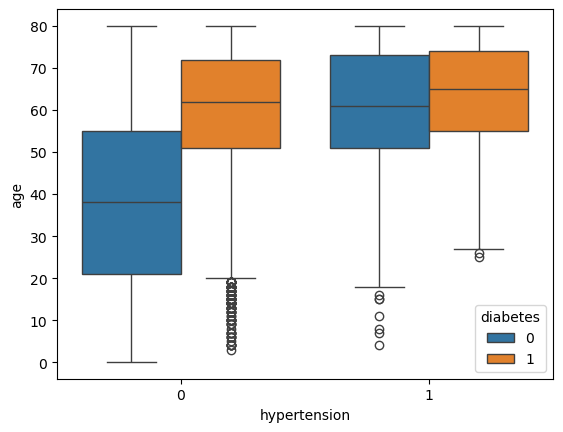

In [19]:
plt.figure()
sns.boxplot(x='hypertension', y='age', hue='diabetes', data=df)
plt.show()

<span style = 'color: salmon'>We can see that age and hypertension are strongly related, with elder people more easy to get hypertension. Among individuals with hypertension, the age distribution is similar for those with and without diabetes, indicating that hypertension may independently contribute to the risk of diabetes regardless of age.

Now, let's check heart_disease.

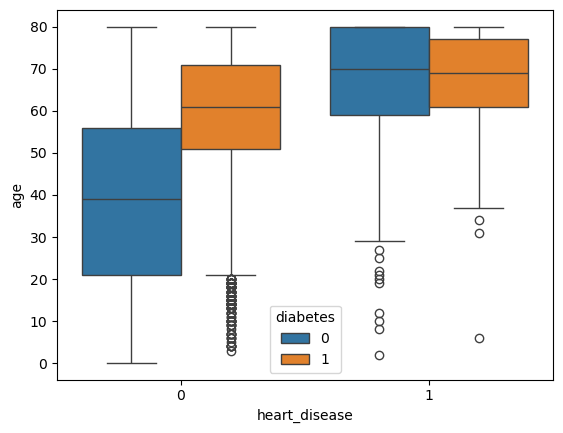

In [20]:
plt.figure()
sns.boxplot(x='heart_disease', y='age', hue='diabetes', data=df)
plt.show()

<span style = 'color: salmon'>Same with hyperextension,  age and heart_disease are strongly related, heart_disease may independently contribute to the risk of diabetes  with only a small influence from age.

<Axes: xlabel='age', ylabel='Count'>

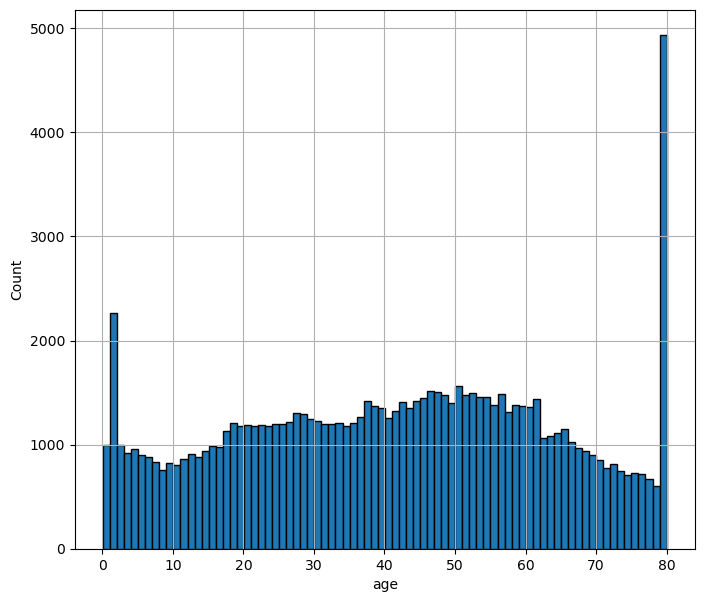

In [21]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['age'].hist(edgecolor="black", bins=80)



Observation:

- The distribution appears relatively uniform across various age groups
- The highest peak is around 50 years old.

In [22]:
print("MAX AGE: "+str(df['age'].max()))
print("MIN AGE: "+str(df['age'].min()))

MAX AGE: 80.0
MIN AGE: 0.08


<span style = 'color: salmon'>The minimum age of 0.08 caught my attention. I plan to pull the records of those individuals for a closer look.

In [23]:
# Find people with the minimum age
min_age = df['age'].min()
person_info = df[df['age'] == min_age]


print(person_info)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
155    Female  0.08             0              0         No Info  14.43   
2049   Female  0.08             0              0         No Info  13.35   
3742     Male  0.08             0              0         No Info  12.80   
9683   Female  0.08             0              0         No Info  11.88   
13162    Male  0.08             0              0         No Info  27.32   
16028    Male  0.08             0              0         No Info  14.40   
29551    Male  0.08             0              0         No Info  13.55   
30060    Male  0.08             0              0         No Info  12.89   
32402    Male  0.08             0              0         No Info  13.68   
33684    Male  0.08             0              0         No Info  30.64   
34663    Male  0.08             0              0         No Info  27.32   
38883    Male  0.08             0              0         No Info  14.92   
40039  Female  0.08      

The details of the information look fine to me, so I assume they are valid data for one-month-old babies.

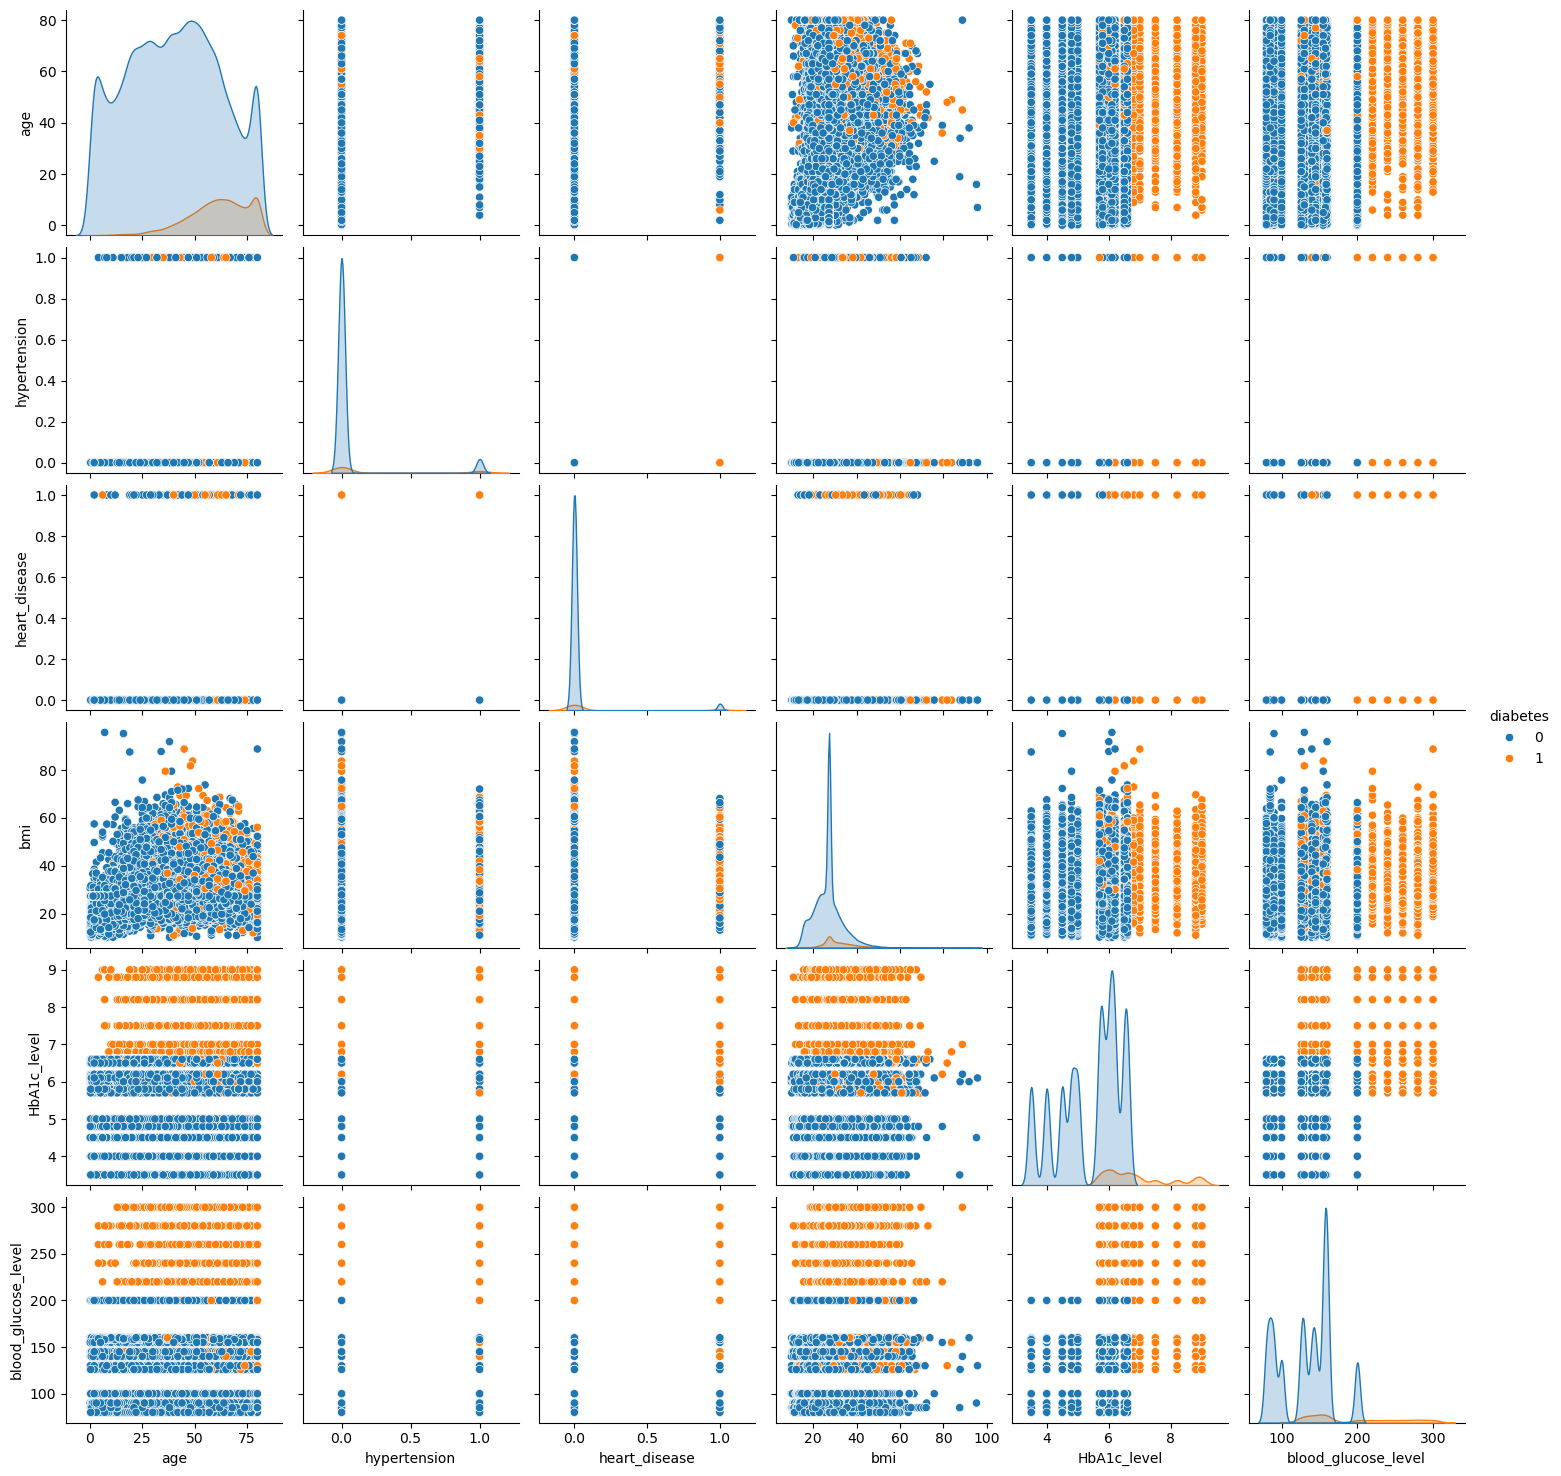

In [24]:
sns.pairplot(df,hue='diabetes')

According to the pairplot, we can see that 
- Age is a strong predictor of diabetes, with older individuals at higher risk.
- Hypertension and heart disease are associated with a higher prevalence of diabetes.
- BMI, HbA1c level, and blood glucose level are significant indicators of diabetes. Higher values in these features are strongly associated with the presence of diabetes.

In [25]:
# To make things easier, we will encode the yes/no in 'registered' as 1/0

df['gender'] = np.where(df['gender'] == 'Female', 1, 0)

In [26]:
# Sanity Check
df['gender'].value_counts()

gender
1    56161
0    39985
Name: count, dtype: int64

In [27]:
# Map the smoking_history categories to 'yes' or keep as 'never'
df['smoking_history'] = df['smoking_history'].replace({
    'ever': 'yes',
    'not current': 'yes',
    'current': 'yes',
    'former': 'yes'
})

In [28]:
# Sanity Check
print(df['smoking_history'].unique())

['never' 'No Info' 'yes']


In [29]:
# Map smoking_history to numerical values
smoking_history_mapping = {
    'yes': 1,
    'never': 0,
    'No Info': 2
}
df['smoking_history'] = df['smoking_history'].map(smoking_history_mapping)


In [30]:
# Sanity Check
print(df['smoking_history'].unique())

print(df.head())

[0 2 1]
   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       1  80.0             0              1                0  25.19   
1       1  54.0             0              0                2  27.32   
2       0  28.0             0              0                0  27.32   
3       1  36.0             0              0                1  23.45   
4       0  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


#### Colinearity

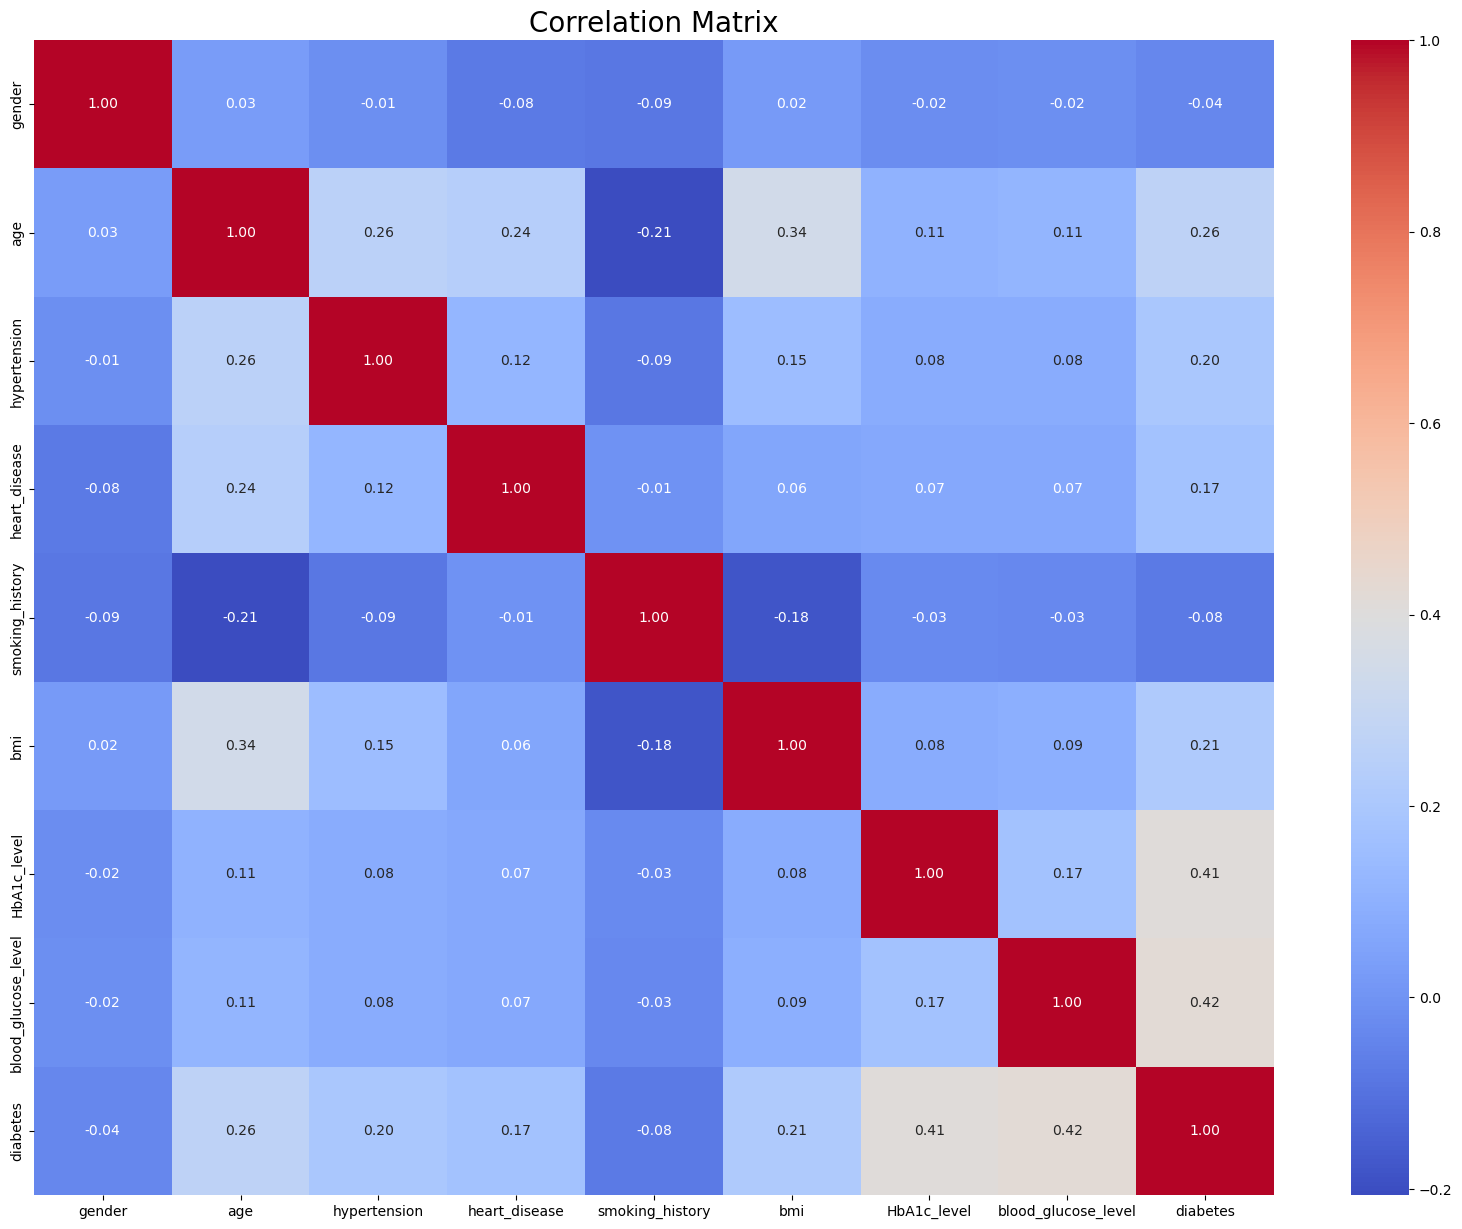

In [31]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='coolwarm')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

Observation: 

- HbA1c Level and Blood Glucose Level have strong correlation with diabetes of 0.41 and 0.42.
- Age, BMI and hypertention, heart_disease have moderate correlation with diabetes of 0.26, 0.21, 0.2, and 0.17.
- Smoking_histroy and gender have low correlation with diabetes.

In [32]:
numerical_cols = df.select_dtypes('number').columns

## Preprocessing

Check whether there is outlier.

In [33]:
for feature in numerical_cols:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    has_outliers = df[(df[feature] < lower) | (df[feature] > upper)].any(axis=None)
    if has_outliers:
        print(feature, "has outliers")
    else:
        print(feature, "no outliers")


gender no outliers
age no outliers
hypertension has outliers
heart_disease has outliers
smoking_history no outliers
bmi has outliers
HbA1c_level has outliers
blood_glucose_level has outliers
diabetes has outliers


<span style = 'color: salmon'>We can observe that gender, age, and smoking history do not have outliers. Hypertension, heart disease, and diabetes are numerical columns consisting of only 1s and 0s, so there are no true outliers in these columns. Therefore, we only need to examine BMI, HbA1c level, and blood glucose level for outliers.

<Axes: xlabel='bmi'>

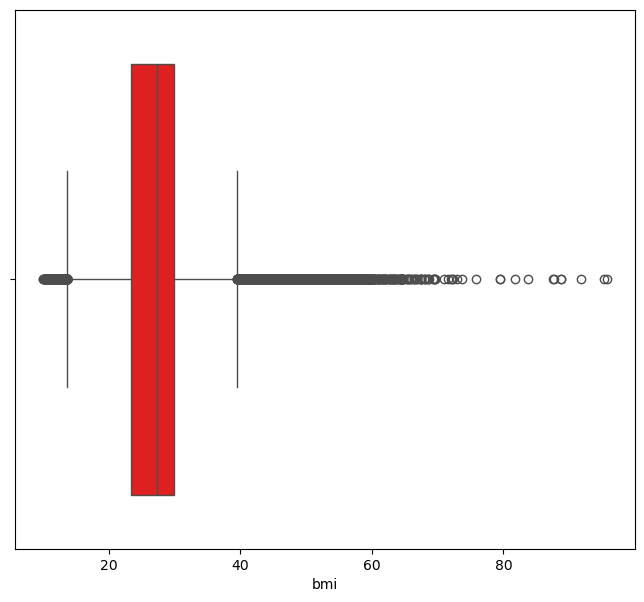

In [34]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["bmi"], color="red")

In [35]:
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['bmi']>upper, "bmi"] = upper

<Axes: xlabel='bmi'>

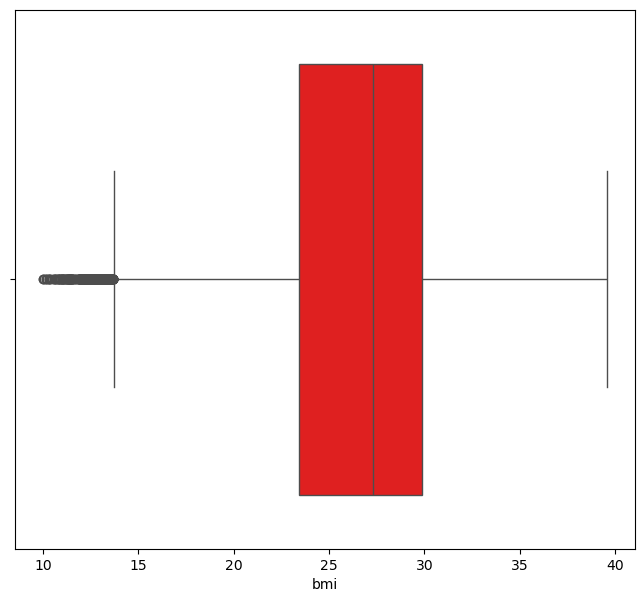

In [36]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["bmi"], color="red")

<span style = 'color: salmon'>Now we finish with bmi, let's deal with HbA1c_level.

<Axes: xlabel='HbA1c_level'>

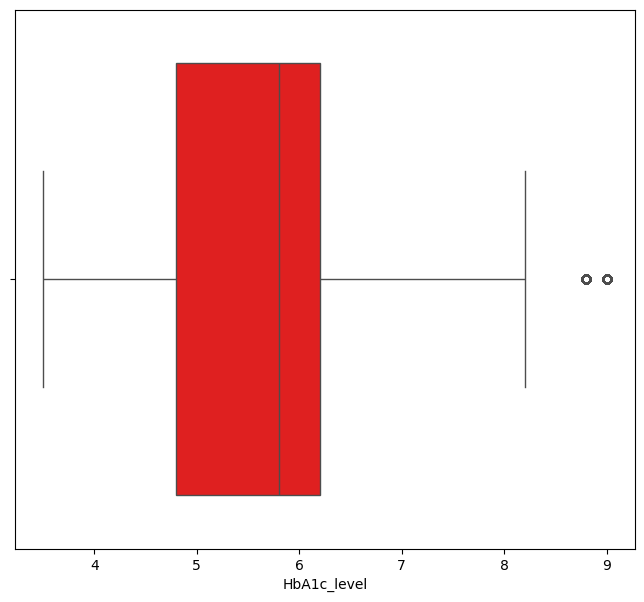

In [37]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["HbA1c_level"], color="red")

In [38]:
Q1 = df.HbA1c_level.quantile(0.25)
Q3 = df.HbA1c_level.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['HbA1c_level'] > upper, "HbA1c_level"] = upper
df.loc[df['HbA1c_level'] < lower, "HbA1c_level"] = lower

<Axes: xlabel='HbA1c_level'>

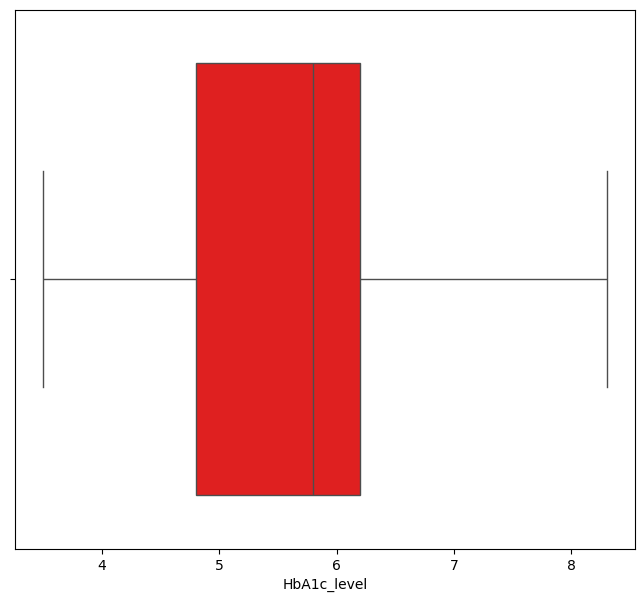

In [39]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["HbA1c_level"], color="red")

<span style = 'color: salmon'>Now we finish with HbA1c_level, let's deal with blood_glucose_level.

<Axes: xlabel='blood_glucose_level'>

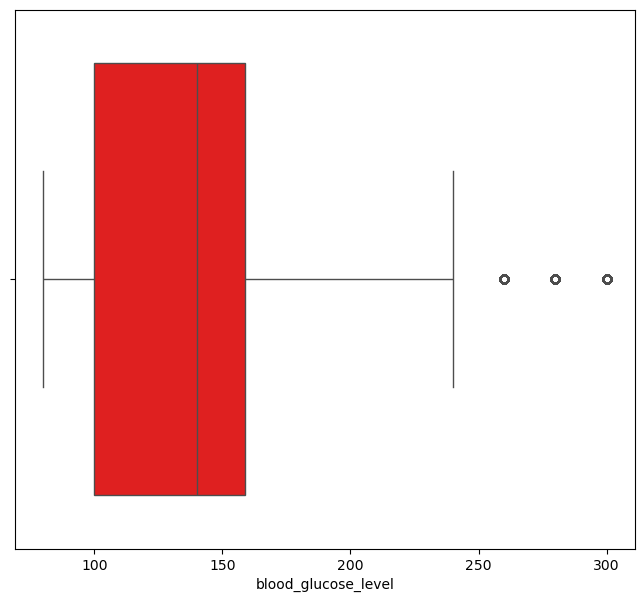

In [40]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["blood_glucose_level"], color="red")

In [41]:
Q1 = df.blood_glucose_level.quantile(0.25)
Q3 = df.blood_glucose_level.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['blood_glucose_level']>upper, "blood_glucose_level"] = upper

<Axes: xlabel='blood_glucose_level'>

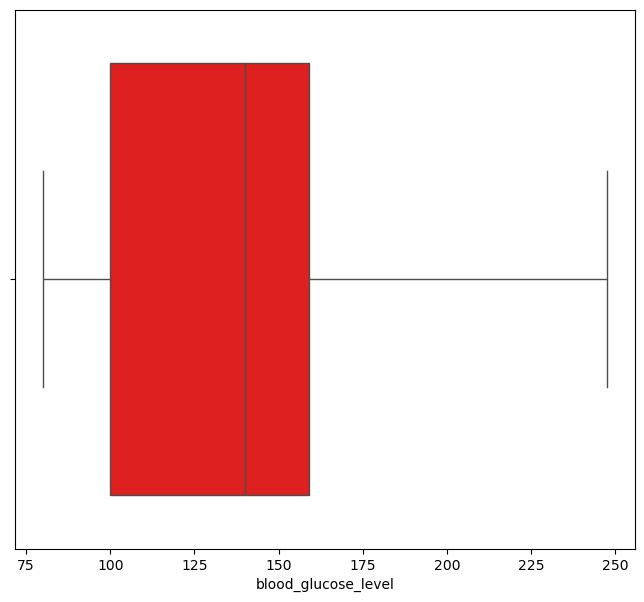

In [42]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["blood_glucose_level"], color="red")

<span style = 'color: salmon'>Now we finish dealing with the preprocessing. 

## Modelling

Now let's split the date, X is independent variables and y is our target.

In [43]:
y = df['diabetes']
X = df.drop(['diabetes'], axis=1)

In [44]:
#Sanity Check
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,1,80.0,0,1,0,25.19,6.6,140.0
1,1,54.0,0,0,2,27.32,6.6,80.0
2,0,28.0,0,0,0,27.32,5.7,158.0
3,1,36.0,0,0,1,23.45,5.0,155.0
4,0,76.0,1,1,1,20.14,4.8,155.0


Let's set 20% of the data for the test set, and 80% will be used as the training set.


In [45]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

Standardize features by removing the mean and scaling to unit variance. I will make it name X_train_ss and X_test_ss, so that in the future when I want to use X_train and X_test, it won't get confused.

In [46]:
scaler =StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)

I choose logistic regression as the model due to its interpretability, efficiency, ability to handle binary outcomes.

In [50]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_ss, y_train)

LogisticRegression()

In [54]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test_ss)


In [67]:
# assess the performance of a logistic regression model on training data by measuring the accuracy of its predictions compared to the true labels.
accuracy_score(y_train, log_reg.predict(X_train_ss))

0.9578111186229133

In [53]:
# calculates and stores the accuracy of a logistic regression model 
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test_ss))

In [52]:
#evaluating the performance of classification models by summarizing their predictions against actual outcomes.
confusion_matrix(y_test, y_pred)

array([[17365,   197],
       [  622,  1046]])

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17562
           1       0.84      0.63      0.72      1668

    accuracy                           0.96     19230
   macro avg       0.90      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230



My precision, recall, and F1-score are significantly higher for individuals without diabetes compared to those with diabetes It is because my dataset is not balanced. Therefore, I need to implement upsampling to address this issue.

### Upsampling and downsampling Using Sklearn

In [55]:
#seprate majority and minority classes

df_majority = df[df.diabetes == 0]
df_minority = df[df.diabetes == 1]

In [57]:
df_majority.shape, df_minority.shape

((87664, 9), (8482, 9))

I am going upsample minority class to match majority class. I will set 42 as a random number generation to ensure reproducibility of results.

In [72]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=df_majority.shape[0],    
                                 random_state=42)


<span style = 'color: salmon'>Upsampling on the dataset is done for increasing the size of the minority class in the dataset

In [60]:
# Concatenate majority df with upsampled minority df
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

Now since I finish upsampling and my data is balance, I am going to use logistic regression model to see the difference.

In [61]:
X = df_upsampled.drop(columns=['diabetes'])
y = df_upsampled['diabetes']

Split your data into training and testing sets. Let's set 20% of the data for the test set, and 80% will be used as the training set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the Logistic Regression Model
Initialize and train the logistic regression model using the training data.

In [62]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

Use the trained model to make predictions on the test data.

In [63]:
y_pred = model.predict(X_test)

In [64]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.939625585023401


In [69]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[17205,   357],
       [  804,   864]])

In [71]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17562
           1       0.71      0.52      0.60      1668

    accuracy                           0.94     19230
   macro avg       0.83      0.75      0.78     19230
weighted avg       0.93      0.94      0.94     19230



We can see that our preicision, recall and f1-score are all getting worse. So I am going to try downsampling now. Similar to Upsampling, we can resample the majority class to have a smaller number of observations to balance out the classes instead of increasing the minority class.

In [73]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    
                                   n_samples=df_minority.shape[0],    
                                   random_state=42)                         

In [74]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])


In [75]:
# Splitting data into features and target
X = df_downsampled.drop(columns=['diabetes'])
y = df_downsampled['diabetes']


Split your data into training and testing sets. Let's set 20% of the data for the test set, and 80% will be used as the training set.

In [76]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Training the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [78]:
# Making predictions
y_pred = model.predict(X_test)

In [79]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8549955791335102


In [80]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[1470,  216],
       [ 276, 1431]])

In [81]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1686
           1       0.87      0.84      0.85      1707

    accuracy                           0.85      3393
   macro avg       0.86      0.86      0.85      3393
weighted avg       0.86      0.85      0.85      3393



<span style = 'color: salmon'>Good news! The precision, recall and f1-score impoves a lot in downsample classification report.


### SMOTE

SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input.

In [83]:
from imblearn.over_sampling import SMOTE

In [84]:
# apply SMOTE:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


Now we split the resampled data into training and testing sets. I will set 42 as a random number generation to ensure reproducibility of results.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [86]:
# Train the logistic regression model

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [87]:
# Make predictions:
y_pred = model.predict(X_test)

In [88]:
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1686
           1       0.87      0.84      0.85      1707

    accuracy                           0.85      3393
   macro avg       0.86      0.86      0.85      3393
weighted avg       0.86      0.85      0.85      3393

Accuracy: 0.8549955791335102


Surprisingly, the classification report for downsample and smote are the same. Let's try a different model, for example, decision tree.

In [54]:
# Decision Tree

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))

print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9986998803889958
0.9495059802392096
[[17022   540]
 [  431  1237]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     17562
           1       0.70      0.74      0.72      1668

    accuracy                           0.95     19230
   macro avg       0.84      0.86      0.85     19230
weighted avg       0.95      0.95      0.95     19230



The classification_report from Decision tree is not bad. Let's try to apply both upsampling and downsampling to your dataset before training the decision tree classifier

In [89]:
df_majority = df[df.diabetes == 0]
df_minority = df[df.diabetes == 1]

In [90]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    
                                   n_samples=df_minority.shape[0],    
                                   random_state=42)

In [91]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

In [92]:
# Separate features and target
X_downsampled = df_downsampled.drop(columns=['diabetes'])
y_downsampled = df_downsampled['diabetes']


In [93]:
# Split the downsampled data into training and testing sets
X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X_downsampled, y_downsampled, test_size=0.2, random_state=42)


In [94]:
# Train the decision tree model on downsampled data
DT_ds = DecisionTreeClassifier(random_state=42)
DT_ds.fit(X_train_ds, y_train_ds)


DecisionTreeClassifier(random_state=42)

In [95]:
# Make predictions
y_pred_ds = DT_ds.predict(X_test_ds)


In [96]:
print(confusion_matrix(y_test_ds, y_pred_ds))
print(classification_report(y_test_ds, y_pred_ds))

[[1462  224]
 [ 205 1502]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1686
           1       0.87      0.88      0.88      1707

    accuracy                           0.87      3393
   macro avg       0.87      0.87      0.87      3393
weighted avg       0.87      0.87      0.87      3393



It seems better than logistic regression after downsample. Let's take a look at upsample using smote.

In [97]:
# apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [98]:
 # plit the resampled data into training and testing sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [99]:
# train the decision tree model on SMOTE data
DT_smote = DecisionTreeClassifier(random_state=42)
DT_smote.fit(X_train_smote, y_train_smote)


DecisionTreeClassifier(random_state=42)

In [101]:
# Make predictions
y_pred_smote = DT_smote.predict(X_test_smote)

In [102]:
print(confusion_matrix(y_test_smote, y_pred_smote))
print(classification_report(y_test_smote, y_pred_smote))

[[1462  224]
 [ 205 1502]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1686
           1       0.87      0.88      0.88      1707

    accuracy                           0.87      3393
   macro avg       0.87      0.87      0.87      3393
weighted avg       0.87      0.87      0.87      3393



Surprisingly, the results for upsampling and downsampling with the decision tree are exactly the same.

## Conclusion 

1. Regarding the relationship between diabetes and all the factors.
- HbA1c Level and Blood Glucose Level have strong correlation with diabetes of 0.41 and 0.42.
- Age, BMI and hypertention, heart_disease have moderate correlation with diabetes of 0.26, 0.21, 0.2, and 0.17.
- Smoking_histroy and gender have low correlation with diabetes.
None of the columns are highly correlated with diabetes, so I have decided to keep all of them.


2. Among all the models, the decision tree with downsampling performed the best.